In [1]:
import numpy as np
import random
import math
import h5py
import snapshot as SN
import matplotlib.pyplot as plt
from nbodykit.lab import *
from nbodykit import setup_logging, style

In [2]:
basePath = '/Users/usuario-mac/Desktop/TNG300-3/postprocessing'
fields = ['Coordinates']
dm_pos=SN.loadSubset(basePath,99,'DM',fields=fields)
print(dm_pos.shape)

(244140625, 3)


In [3]:
position=dm_pos/1000
x=dm_pos[:,0]/1000;
y=dm_pos[:,1]/1000;
z=dm_pos[:,2]/1000;

dm_posArr=np.array([x,y,z],dtype=[('x','f'),('y','f'),('z','f')]).T
print(dm_posArr.shape)
DMdensity_cat = ArrayCatalog(data=dm_posArr)

(244140625, 3)


ArrayCatalog(size=244140625)
0.99999845 0.0 12950.689


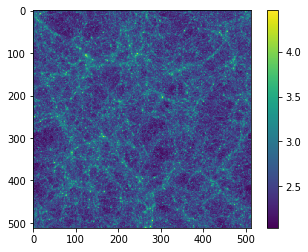

In [4]:
DMdensity_mesh=DMdensity_cat.to_mesh(Nmesh=512,BoxSize=205,window='tsc',position='y')
print(DMdensity_cat)

plt.imshow(np.log10(DMdensity_mesh.preview(axes=[0,1])+1))
plt.colorbar()

density=DMdensity_mesh.preview(Nmesh=512)

print(np.mean(density), np.min(density), np.max(density))

f=h5py.File('Density_DMTNG.hdf5','w')
dset=f.create_dataset('density',data=density)
f.close()

KeysView(<HDF5 file "Density_DMTNG.hdf5" (mode r)>)


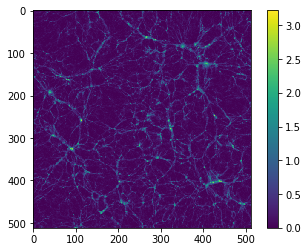

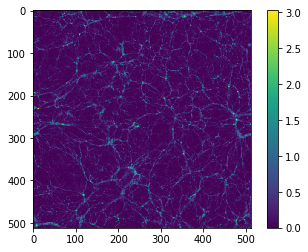

In [6]:
filename = 'Density_DMTNG.hdf5'
f = h5py.File(filename, 'r')
print(f.keys())
data = f['density'][:,:,:]
f.close()

plt.figure()
plt.imshow(np.log10(data[:,100,:]+1))
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(np.log10(data[20,:,:]+1))
plt.colorbar()

/anaconda3/lib/python3.6/site-packages/nbodykit/algorithms/fftpower.py:610: RuntimeWarning: invalid value encountered in sqrt
  xslab **= 0.5


1.3804176116481408 249.54089310847306


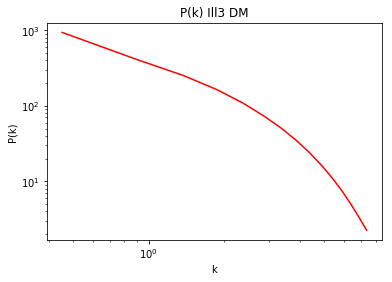

In [7]:
overdensity=(density-np.mean(density))/np.mean(density)


mesh_over = ArrayMesh(overdensity,BoxSize=205)

r1 = FFTPower(mesh_over, mode='1d', dk=0.5, kmin=0.1)
Pk1 = r1.power

print(Pk1['k'][2], Pk1['power'].real[2])

plt.loglog(Pk1['k'], Pk1['power'].real,'r-')
plt.xlabel(r"k")
plt.ylabel(r"P(k)")
plt.title('P(k) Ill3 DM')
plt.savefig('DM_power.png')

f1 = open ('power_DMTNG.dat','w')
save=list(zip(Pk1['k'],Pk1['power'].real))
for h,l in enumerate(save):
    line1=''.join(str(x).ljust(20) for x in l)
    f1.writelines(line1+ '\n')
f1.close()

f5=h5py.File('over_DMTNG.hdf5','w')
dset=f5.create_dataset('over',data=overdensity)
f5.close()

